In [50]:
# credit card fraud detection using scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [53]:
# load data

df = pd.read_parquet('data/credit_card_fraud.parquet', engine='pyarrow')
df

,timestamp,label,user_id,amount,merchant_id,trans_type,foreign,interarrival
0,1765503833,legitimate,8730,9.66,19956,contactless,False,8002.0
1,1741328710,legitimate,7740,9.72,1188,online,True,5805.0
2,1682778767,legitimate,9009,19.59,12364,manual,False,18125.0
3,1659489350,legitimate,3083,29.39,1073,contactless,False,53561.0
4,1736942507,legitimate,4593,16.09,18896,contactless,False,5172.0
...,...,...,...,...,...,...,...,...
7499995,1761960303,legitimate,1075,3.85,18754,online,True,5164.0
7499996,1677395814,legitimate,1352,19.12,7037,manual,False,5403.0
7499997,1760566097,legitimate,452,15.19,8289,contactless,False,9515.0
7499998,1762349322,legitimate,6260,3.22,2664,contactless,False,38839.0


In [54]:
# preprocessing

# encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['label'] = df['label'].map({0: 1, 1: 0})  # 1 = fraud, 0 = not fraud
df['trans_type'] = le.fit_transform(df['trans_type'])
df['foreign'] = le.fit_transform(df['foreign'])

# add hour feature, remove timestamp
df['timestamp'] = df.timestamp.values.astype(np.int64) * 10 ** 9
df['hour'] = pd.to_datetime(list(df['timestamp'].values)).hour
df.drop('timestamp', axis=1, inplace=True)

# delete bad data
df.dropna(inplace=True)
df.drop(df[df.isnull().any(axis=1)].index, inplace=True)

In [55]:
# create train and test sets

X = df.drop('label', axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create logistic regression model

model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
# export model

with open('models/credit_card_fraud.pkl', 'wb') as f:
    joblib.dump(model, f)

In [ ]:
# import model

with open('models/credit_card_fraud.pkl', 'rb') as f:
    model = joblib.load(f)

In [57]:
# evaluate accuracy

predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy:\t', accuracy)
print('Precision:\t', precision)
print('Recall:\t\t', recall)
print('F1:\t\t', f1)

Accuracy:	 0.9949535189021353
Precision:	 0.9521512554373573
Recall:		 0.7739270461387664
F1:		 0.8538379839721927


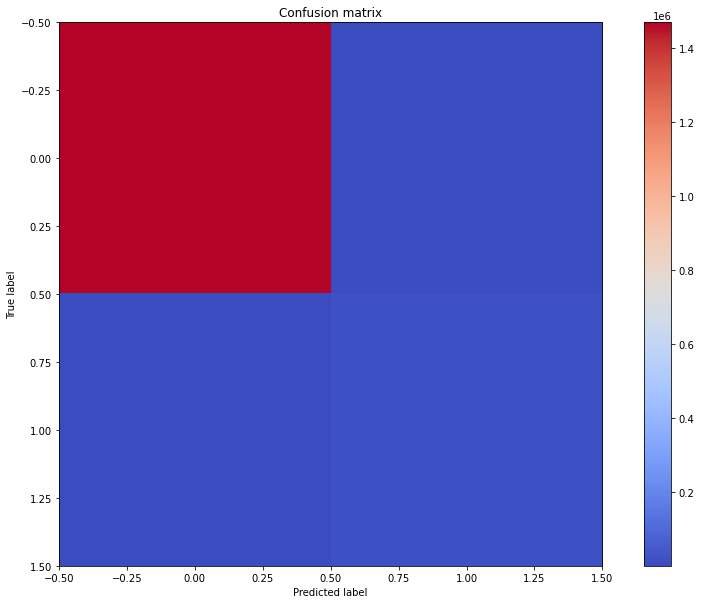

In [58]:
# plot confusion matrix

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(15, 10))
plt.imshow(cm, interpolation='nearest', cmap='coolwarm')
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()